Krista Miller
Data Visualization Assignment 5

In [12]:
import pandas as pd
import folium
from shapely.geometry import Point, LineString, Polygon
from shapely.geometry import box
import numpy as np
import geopandas as gpd
import geoplot as gplt
import json
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.tools as tls
import plotly.graph_objs as go
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Output, Input

Assignment 5, Part 1: Using the file capitals_lat_lon.csv, form a data frame and write out an HTML file which when rendered in a browser displays a marker for each capital city. Hint: use folium.

In [13]:
df = pd.read_csv('capitals_lat_lon.csv')

map=folium.Map(location=[39.7,-105], zoom_start=2)  # Denver

for index, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']],
                  popup=row['Capital'],
                  icon=folium.Icon(icon='cloud', color= 'green')).add_to(map)
    
map.save("world_capitals.html")        # Now point browser at that file

Assignment 5, Part 2: Estimate the latitude and longitude for three points of a triangle that would just cover Africa or come close.  (Hint: Rabat, Capetown, and Mogadishu, for example.)  Use folium to demonstrate where the points are on the map so that a person could see at a glance that they do.  Use Shapely to define a polygon from those three points.  Compute the area and perimeter of the triangle assuming flat earth and allowing each degree of latitude and each degree of longitude to be considered one unit of length.

In [14]:
map2=folium.Map(location=[30,20], zoom_start=3)

data= pd.DataFrame({
    'lon': [-6.84, 45.31, 18.42],
    'lat': [33.97, 2.04, -33.91],
    'name':['Rabat', 'Mogadishu', 'Cape Town']
})

for i in range(0, len(data)):
    folium.Marker(
    location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
    popup= data.iloc[i]['name'],
    ).add_to(map2)
    
map2.save("africa.html")

poly1=Polygon([(-6.84,33.97),(45.31,2.04),(18.42,-33.91)])  # list of tuples
print("Area of triangle:", poly1.area)
print("Perimeter of triangle:",poly1.length)


Area of triangle: 1366.6951
Perimeter of triangle: 178.47023857223238


Assignment 5, Part 3: Estimate the boundaries for Kansas (use just four lat-lon points) and Nebraska (use just six points).  Construct a geojson file from that.  Then write a Python program to read that file, form a dictionary, and plot the result.

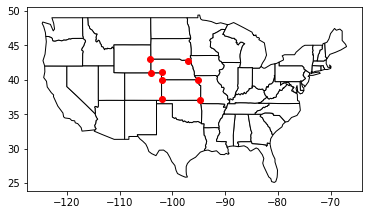

In [15]:
def gplot(file):
#this function forms a dictionary of geojson coordinates and plots them on a map of the USA
    with open (file) as f:
        data = json.load(f)
        
    contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
    base= contiguous_usa.plot(color= 'white', edgecolor= 'black')
    df_places = gpd.read_file(file)
    df_places.plot(ax=base, marker= 'o', color= 'red')

gplot('map.geojson')


Assignment 5, Part 4: Generate at random the “happiness index” for each state in the USA.  Provide a choropleth of the USA with that data represented thereon.  Use Plotly and make sure the viewer can zoom in and out of the map and pan back and forth.

In [16]:
states= pd.read_csv('happiness.csv')
states.columns = ['code','region','index', 'happy']
colors = px.colors.qualitative.Set2

happiness_max= states['happy'].max()

def group_population(x):
    y = int(happiness_max / 5)
    if x < y:
        return '{}~{}'.format(0, y)
    elif x < y * 2:
        return '{}~{}'.format(y, y*2)
    elif x < y * 3:
        return '{}~{}'.format(y*2, y*3)
    elif x < y * 4:
        return '{}~{}'.format(y*3, y*4)
    else:
        return '{}~{}'.format(y*4, y*5)
    
states['Happiness (Grouped)'] = states['happy'].apply(group_population)

px.choropleth(states,
              locations='code',
              locationmode='USA-states',
              scope='usa',
              color='Happiness (Grouped)',
              color_discrete_map=dict(zip(states['Happiness (Grouped)'].unique(), colors)))


Assignment 5, Part 5: Generate 500 points from the random exponential distribution.  Choose your own parameters for that.  Use Bokeh or Plotly Dash and plot a histogram of that distribution such that there are fifteen bins.  Make the plot interactive so the user can select the number of bins with a slider, pull down or text entry box.

In [18]:
expo_dist = np.random.exponential(10, size = 500)

df = pd.DataFrame(expo_dist, columns=['points'])
df.head()

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id="graph"),
    html.P("Bins:"),
    dcc.Slider(id="bin", min=1, max=15, value=1, 
               marks={1: '1', 15: '15'}),
])

@app.callback(
    Output("graph", "figure"), 
    [Input("bin", "value")])
def display_color(bin):
    fig = px.histogram(df, nbins=bin, range_x=[0, 100])
    return fig

app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [16/Nov/2021 18:51:16] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/Nov/2021 18:51:16] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [16/Nov/2021 18:51:16] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [16/Nov/2021 18:51:16] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [16/Nov/2021 18:51:16] "GET /_dash-component-suites/dash/dcc/async-slider.js HTTP/1.1" 200 -
127.0.0.1 - - [16/Nov/2021 18:51:16] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [16/Nov/2021 18:51:17] "POST /_dash-update-component HTTP/1.1" 200 -
